In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from math import factorial
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Придуманное распределение: $p_\xi(x) = {5 \over {x ^ 6}}  I(x \geq 1)$

$E \xi = \int _ 1 ^ \infty {5x \over {x^6}}dx = {5 \over 4}$

$E \xi ^ 2 = \int _ 1 ^ \infty {5x^2 \over {x^6}}dx = {5 \over 3}$

$E \xi ^ 3 = \int _ 1 ^ \infty {5x^3 \over {x^6}}dx = {5 \over 2}$

$E \xi ^ 4 = \int _ 1 ^ \infty {5x^4 \over {x^6}}dx = {5}$

$E \xi ^ 5 = \int _ 1 ^ \infty {5x^5 \over {x^6}}dx = /infty$

$D \xi = E \xi^2 - (E \xi)^2 = {5 \over 3} - {25 \over 16} = {{80 - 75} \over 48} = {5 \over 48}$

In [3]:
class my_gen(sps.rv_continuous):
    def _pdf(self, x):
        return 5 * (x ** -6)
my = my_gen(a=1, name='my')

Эксперимент с моим распределением.

In [7]:
def my_exp(N):
    grid = np.linspace(0, 5, 1000)
    plt.figure(figsize=(10, 10))
    X = my.rvs(size=N)
    plt.scatter(X, np.zeros(N), color='green', alpha=0.010, label='sample')  
    plt.plot(grid, my.pdf(grid), color='red', label='density')
    plt.legend()
    plt.show()
    
    grid = np.linspace(0, 5, 1000)
    plt.figure(figsize=(10, 10))
    s2deltas = np.zeros(N).reshape(N)
    for n in range(1, N):
        s2deltas[n] = abs(sps.moment(X[:n], 2) - 5./48)
    plt.plot(range(0, N), s2deltas, color='green', label='difference')  
    
    plt.legend()
    plt.show()

Эксперимент с распределением Коши.

In [8]:
def cauchy_exp(N):
    grid = np.linspace(-15., 15., 1000)
    plt.figure(figsize=(10, 10))
    X = sps.cauchy.rvs(size=N)
    plt.scatter(X, np.zeros(N), color='green', alpha=0.010, label='sample')  # Наносим точки выборки
    plt.plot(grid, sps.cauchy.pdf(grid), color='red', label='density') # Плотность
    plt.xlim(-15., 15.)
    plt.legend()
    plt.show()
    
    grid = np.linspace(-15., 15., 1000)
    plt.figure(figsize=(10, 10))
 
    s2s = np.zeros(N).reshape(N)
    for n in range(1, N):
        s2s[n] = sps.moment(X[:n], 2)
    plt.plot(range(0, N), s2s, color='green', label='s2')  # Наносим точки выборки
    plt.legend()
    plt.show()

Первый график - плотность моего распределения.

Второй - зависимость модуля разности оценки дисперсии и ее реального значения от n.

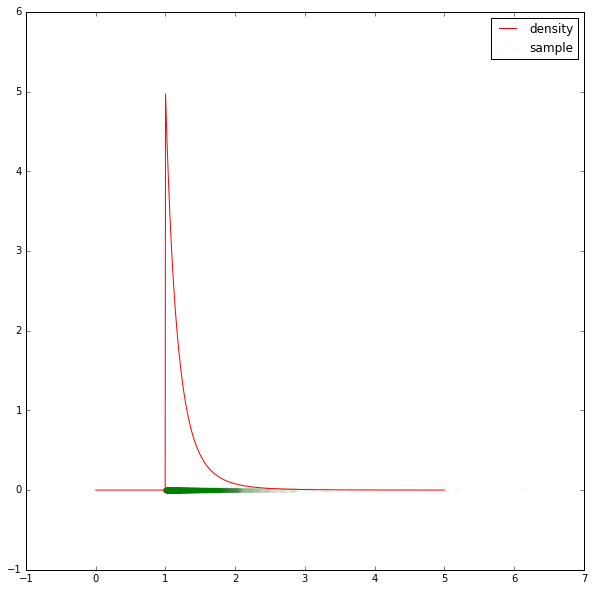

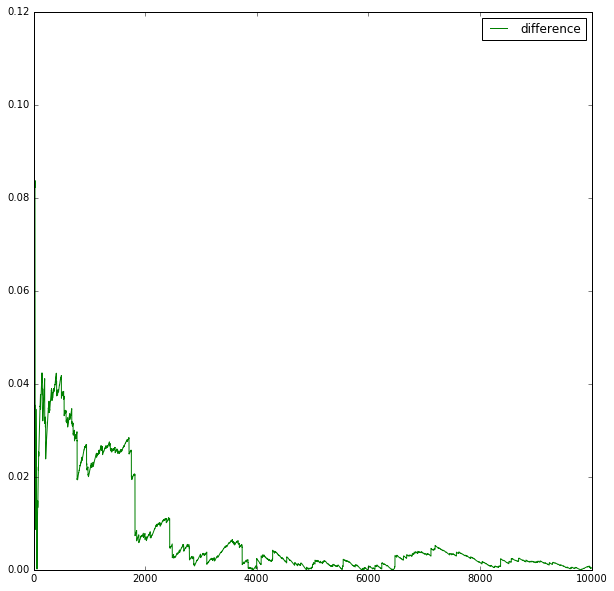

In [9]:
my_exp(N = 10000)

Первый график - плотность распределения Коши.
Второй - оценка его дисперсии.

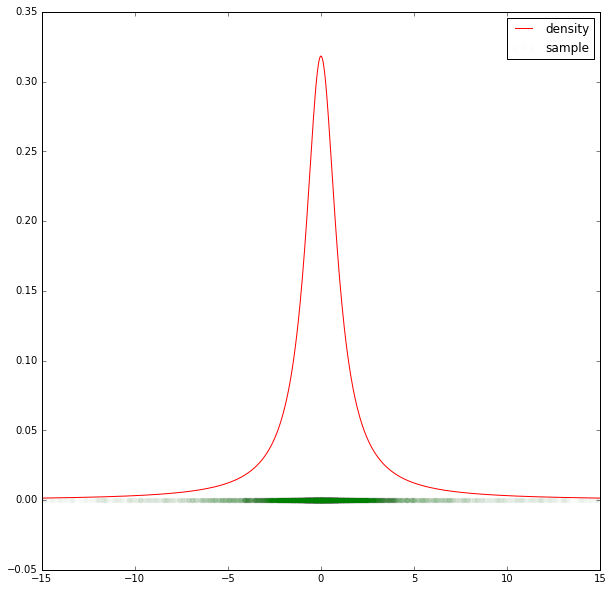

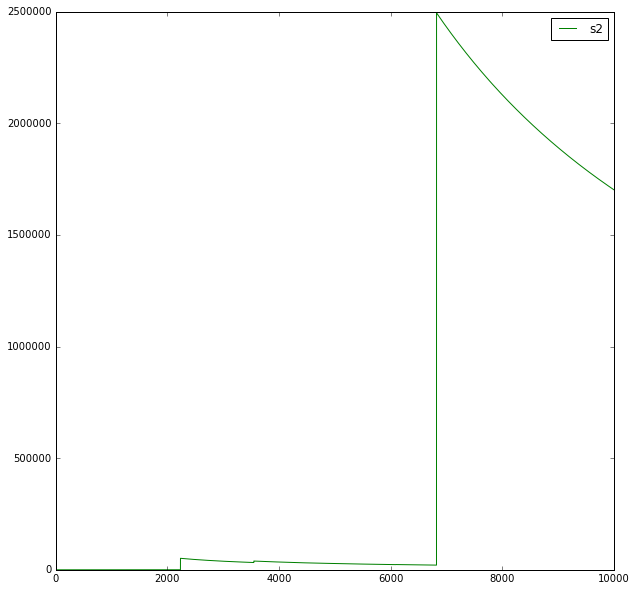

In [11]:
cauchy_exp(N=10000)